# Interaktive Bildvisualisierung mit napari
[napari](https://napari.org/) ist ein Python-basierter Bildbetrachter. Dieses Notebook demonstriert, wie man ihn von Python aus fernsteuern kann.

Siehe auch
* [napari Viewer Tutorial](https://napari.org/tutorials/fundamentals/viewer.html)
* [napari Image Layer Tutorial](https://napari.org/tutorials/fundamentals/image.html)
* [napari Labels Layer Tutorial](https://napari.org/tutorials/fundamentals/labels.html)
* [Multi-dimensionale Bildvisualisierung in Python mit napari [NEUBIAS Academy@Home] Webinar](https://www.youtube.com/watch?v=VgvDSq5aCDQ)

Zum Öffnen eines Bildes verwenden wir weiterhin scikit-image:

In [1]:
import napari
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatm
import napari_skimage_regionprops as nsr

In [2]:
# Erstellen eines leeren Viewers
viewer = napari.Viewer()

Zuerst laden wir ein Bild und zeigen es im Viewer an.

In [3]:
image = imread('../../data/nuclei.tif')

viewer.add_image(image)

<Image layer 'image' at 0x1e423868df0>

Mit diesem Befehl können wir einen Screenshot von napari machen und ihn in unserem Notebook speichern.

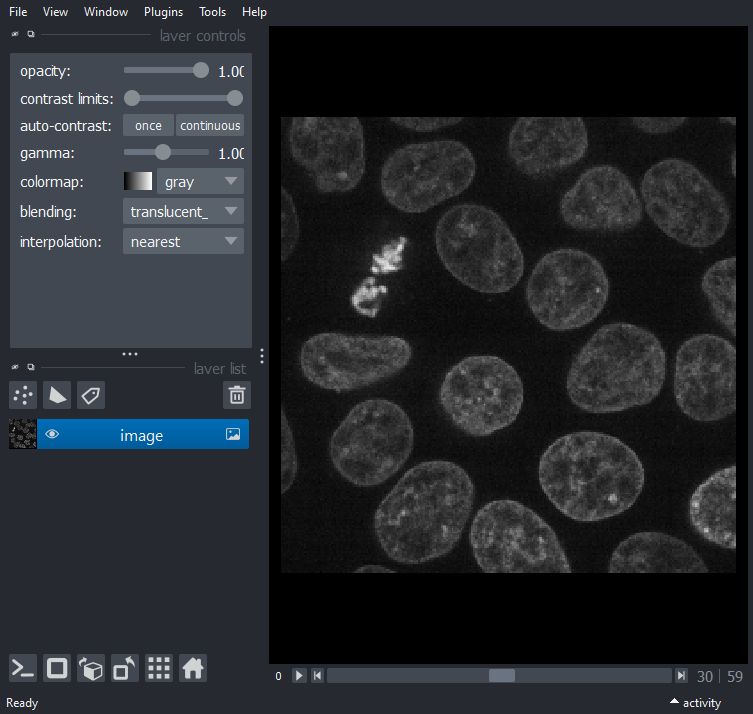

In [4]:
napari.utils.nbscreenshot(viewer)

## Zellsegmentierung
Wir können auch die Zellkerne segmentieren und sie über dem Bild anzeigen.

In [5]:
label_image = nsbatm.voronoi_otsu_labeling(image, spot_sigma=9)

# Labels zum Viewer hinzufügen
label_layer = viewer.add_labels(label_image)

Sie können markierte Objekte als Overlay visualisieren (standardmäßig)

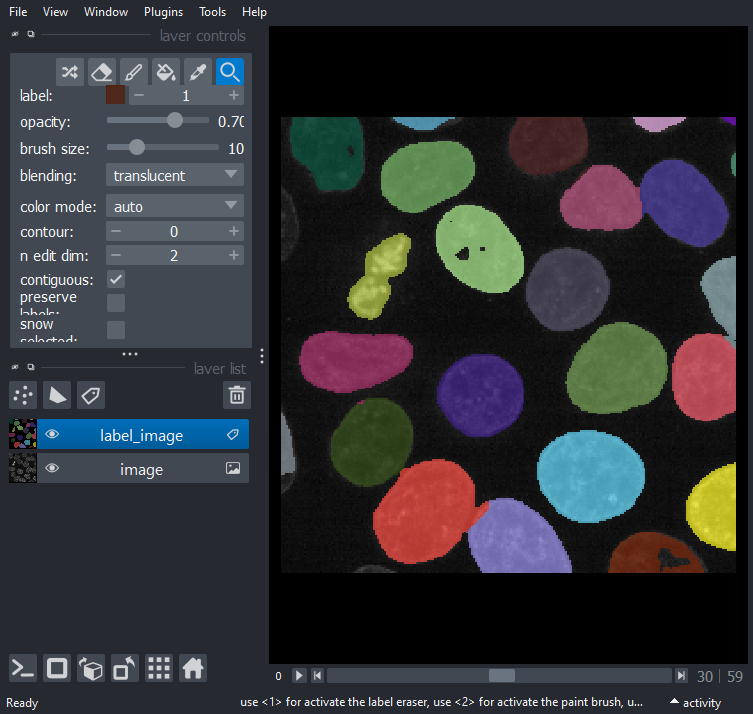

In [6]:
napari.utils.nbscreenshot(viewer)

... oder als undurchsichtige Konturen

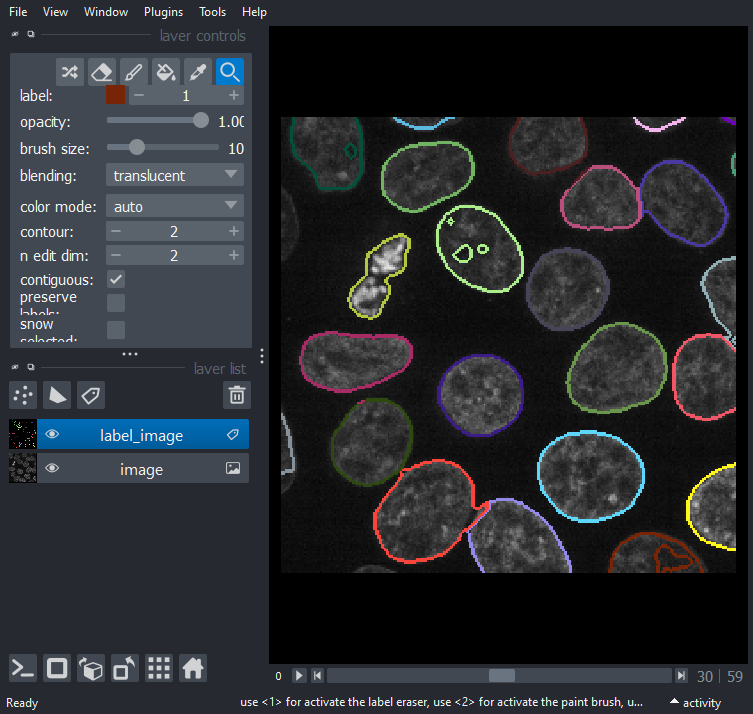

In [7]:
label_layer.contour = 2
label_layer.opacity = 1

napari.utils.nbscreenshot(viewer)

## Quantitative Messungen
Wir können auch quantitative Messungen ableiten und sie an den napari Viewer anhängen.

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


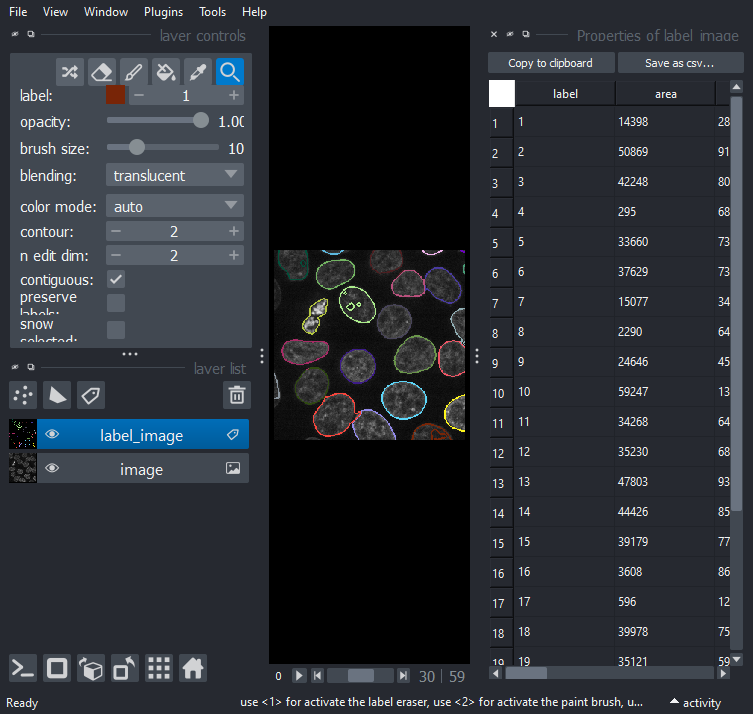

In [8]:
nsr.regionprops_table(image, label_image, napari_viewer=viewer)

napari.utils.nbscreenshot(viewer)